# part 2

In [160]:
import random

In [147]:
hello_rules = '''
say_hello = names hello tail
names = name names | name
name = Jhon | Mike | 老梁 | 老刘
hello = 你好 | 您来啦 | 快请进
tail = 呀 | 吗 | !
'''

In [148]:
rules = dict() #key is the statement, value is expression

In [152]:
stmt_split = '='
or_split = '|'

for line in hello_rules.split('\n'):
    if not line:continue
    #skip the empty line
    stmt , expr = line.split(stmt_split)

    print(stmt , expr.split(or_split))

    rules[stmt.strip()] = expr.split(or_split)#delete spaces

say_hello  [' names hello tail']
names  [' name names ', ' name']
name  [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘']
hello  [' 你好 ', ' 您来啦 ', ' 快请进']
tail  [' 呀 ', ' 吗 ', ' !']


In [153]:
rules

{'say_hello': [' names hello tail'],
 'names': [' name names ', ' name'],
 'name': [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘'],
 'hello': [' 你好 ', ' 您来啦 ', ' 快请进'],
 'tail': [' 呀 ', ' 吗 ', ' !']}

In [154]:
rules['names']

[' name names ', ' name']

In [155]:
rules['name']

[' Jhon ', ' Mike ', ' 老梁 ', ' 老刘']

In [156]:
def generate(grammar_rule ,target):
    if target in grammar_rule:# get statement name #names
        candidates = grammar_rule[target]# get expressions #['name names','name']
        candidate = random.choice(candidates)# randomly choose one expressiont#'name names','name'
        return ' '.join(generate(grammar_rule, target = c.strip()) for c in candidate.split())#pay attention to the split(' ') or will split by characters   
    else:
        return target

In [157]:
generate(rules, target = 'say_hello')

'老刘 老刘 Mike 老梁 您来啦 !'

## 合并封装

In [226]:
import random

In [239]:
hello_rules = '''
say_hello = names hello tail
names = name names | name
name = Jhon | Mike | 老梁 | 老刘
hello = 你好 | 您来啦 | 快请进
tail = 呀 | 吗 | !
'''

In [240]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个 | 那个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [241]:
def get_generation_by_gram(grammar_str, target ,stmt_split='=', or_split='|'):
    rules = dict()
    for line in grammar_str.split('\n'):
        if not line : continue
        stmt , expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.split(or_split)

    generated = generate(rules, target = target)
    
    return generated

In [242]:
def generate(grammar_rule ,target):
    if target in grammar_rule:# get statement name #names
        candidates = grammar_rule[target]# get expressions #['name names','name']
        candidate = random.choice(candidates)# randomly choose one expressiont#'name names','name'
        return ' '.join(generate(grammar_rule, target = c.strip()) for c in candidate.split())#pay attention to the split(' ') or will split by characters   
    else:
        return target

In [243]:
get_generation_by_gram(hello_rules, target = 'say_hello')

'Mike 老梁 您来啦 呀'

In [244]:
get_generation_by_gram(simple_grammar, target = 'sentence', stmt_split='=>')

'一个 小小的 篮球 看见 那个 好看的 小小的 女人'

## programming

In [260]:
simple_programming = '''
if_stmt => if( cond ){stmt}
cond => var op var
stmt => if_stmt | assignment
assignment => var = var
op =>  | == | < | > | <= | >= | !=
var => char var | char
char => a | b | c | d | e | 1 | 2 | 3 | 4 | 5 | 0 | q | d
'''

In [261]:
for i in range(20):
    print(get_generation_by_gram(simple_programming , target = 'if_stmt',stmt_split='=>'))

if( 0 == 0 c 4 0 ){stmt}
if( d >= c a d c 1 q ){stmt}
if( 5 c < 0 ){stmt}
if( 0 <= 4 ){stmt}
if( q >= d 4 ){stmt}
if( b  2 q ){stmt}
if( b 1 != d 3 1 ){stmt}
if( b 0 != b d ){stmt}
if( e d 3  q e ){stmt}
if( a != 3 c 2 ){stmt}
if( 0 >= 4 e b 3 ){stmt}
if( 5  1 ){stmt}
if( q <= 2 3 ){stmt}
if( 5 <= 3 ){stmt}
if( 2 != 5 2 ){stmt}
if( 5 != d d d ){stmt}
if( 4 == d ){stmt}
if( q 5 d e d 3 1 <= 4 ){stmt}
if( q d >= 2 ){stmt}
if( 3 <= 5 c b 0 d ){stmt}


# part 3

landguage Model:The probablity of a sentence:
N-gram Models
一句话的存在只与临近的词有关
现在-我-说-的-这-句-话

## input:sentence(w1...wn) 
## output : probability(0-1)
## 2-Gram Model

$$ Pr(sentence) = pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i,w_{i+1})}{count(w_{i+1})} $$

In [111]:
import random

In [112]:
corpus = 'C:/Users/四月鹿April/Documents/NLP-learning/jupyters_and_slides-master/2019-autumn/article_9k.txt'

In [113]:
FILE = open(corpus,encoding= 'utf-8').read()

In [114]:
len(FILE)

33425826

In [115]:
FILE[:500]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄'

In [116]:
def generate_by_pro( text_corpus , lenth =20):
    return random.sample(text_corpus, lenth)

In [117]:
generate_by_pro(FILE)

['假',
 '中',
 '校',
 '威',
 '发',
 '0',
 '三',
 '奔',
 '分',
 '外',
 '者',
 '黑',
 '大',
 '高',
 '电',
 '生',
 '提',
 '解',
 '驻',
 '个']

In [118]:
import jieba

In [119]:
max_lenth = 1000000
sub_file = FILE[:max_lenth]

In [120]:
def cut(string):
    return list(jieba.cut(sub_file))

In [121]:
TOKENS = cut(sub_file)

In [122]:
len(TOKENS)

532454

In [123]:
TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [124]:
import collections

In [125]:
from collections import Counter

In [126]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [127]:
words_count = Counter(TOKENS)

In [128]:
words_count.most_common()[:10]

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960)]

In [129]:
words_with_fre = [f for w, f in words_count.most_common()]

In [130]:
import matplotlib.pyplot as plt

In [131]:
words_with_fre[:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

In [132]:
import numpy as np

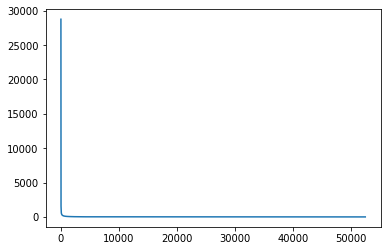

In [133]:
plt.plot(words_with_fre)

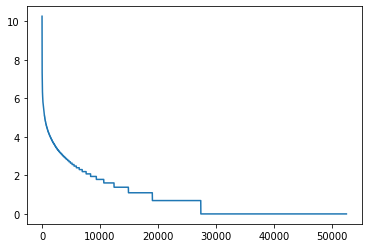

In [134]:
plt.plot(np.log(words_with_fre))#取一次log

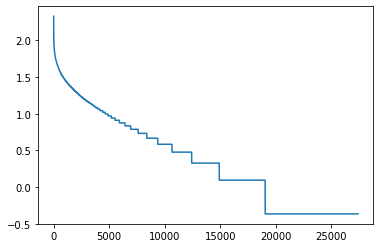

In [135]:
plt.plot(np.log(np.log(words_with_fre)))#取两次log

## 长尾效应，出现次数对半下降，越发趋近于0

$$ Pr(sentence) = pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i,w_{i+1})}{count(w_{i+1})} $$

In [136]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1) 
]

In [149]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [138]:
_2_gram_word_counts = Counter(_2_gram_words)

In [152]:
_2_gram_word_counts.most_common()[:10]

[('6月', 1173),
 ('的是', 362),
 ('也是', 298),
 ('2016年', 296),
 ('都是', 288),
 ('自己的', 283),
 ('2017年', 228),
 ('他的', 228),
 ('更多', 226),
 ('月23', 218)]

In [153]:
words_count = Counter(TOKENS)

In [154]:
words_count.most_common()[-1][-1]

1

In [155]:
def get_1_gram_count(word):#类型1：单词
    if word in words_count : return words_count[word]
    else:
        return words_count.most_common()[-1][-1]#定义为最后一个数字，没有见过的词

In [156]:
def get_2_gram_count(word):#类型2：当前word + 下一word
    if word in _2_gram_word_counts : return _2_gram_word_counts[word]
    else:
        return words_count.most_common()[-1][-1]#定义为最后一个数字，没有见过的词

In [157]:
def get_gram_count(word , we):#合并上面两个 1 word 和 2 words
    if word in we: return we[word]
    else:
        return we.most_common()[-1][-1] 

In [164]:
get_gram_count('月',words_count)#test:one word

2433

In [163]:
get_gram_count('6月',_2_gram_word_counts)#test:two word

1173

In [165]:
def two_gram_model( sentence ):
    tokens = cut(sentence)#list(jieba.cut(sentence))
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        pro = get_gram_count(word + next_word , _2_gram_word_counts) / get_gram_count( next_word , words_count)
        
        probability *= pro
    
    return probability

In [166]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

0.0

In [42]:
two_gram_model('前天早上吃晚饭的时候')

0.0

In [43]:
two_gram_model('前天早上吃早饭的时候')

0.0

In [44]:
two_gram_model('我请你吃火锅')

0.0

In [45]:
two_gram_model('我请你吃日料大餐')

0.0

In [46]:
two_gram_model('这个人来自清华大学')

0.0

In [47]:
two_gram_model('这个人来自秦华大学')

0.0

In [48]:
two_gram_model('这个话特别好看')

0.0

In [49]:
two_gram_model('这个花特别好看')

0.0

In [50]:
two_gram_model('花这特别好看')

0.0

# 简单模型有一些错误：
## AI：more data, better result